https://finance.yahoo.com/calendar/earnings/?day=2023-12-22
https://finance.yahoo.com/calendar/earnings/?day=2023-12-22&offset=100&size=100
Options data for SCCO:
Average IV for Calls: 0.06273051827145576
Average IV for Puts: 0.2593022885824096
Total Call Volume: 1022.0
Total Call open interest: 14098
Total Call engagement: 15120.0
Total Put Volume: 1005.0
Total Put open interest: 10762
Total Put engagement: 11767.0
Number of ITM Call Options: 91
Number of ITM Put Options: 25


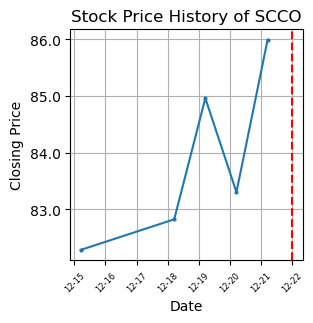

Options data for BANX:
Average IV for Calls: 0.1831136376953125
Average IV for Puts: nan
Total Call Volume: 11.0
Total Call open interest: 36
Total Call engagement: 47.0
Total Put Volume: 54.0
Total Put open interest: 92.0
Total Put engagement: 146.0
Number of ITM Call Options: 2
Number of ITM Put Options: 1


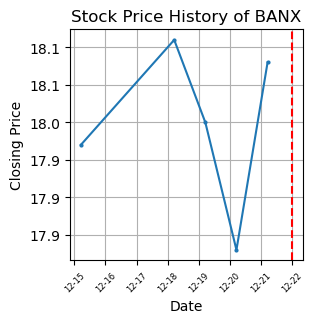

Options data for INSE:
Average IV for Calls: 0.35015887760416664
Average IV for Puts: nan
Total Call Volume: 10158.0
Total Call open interest: 17050
Total Call engagement: 27208.0
Total Put Volume: 1150.0
Total Put open interest: 189.0
Total Put engagement: 1339.0
Number of ITM Call Options: 5
Number of ITM Put Options: 1


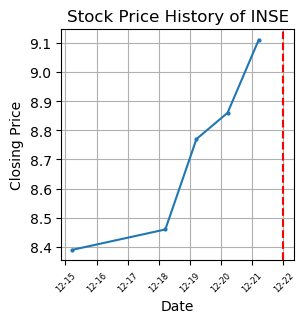

Options data for BYFC:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 55.0
Total Call open interest: 190
Total Call engagement: 245.0
Total Put Volume: 0.0
Total Put open interest: 1.0
Total Put engagement: 1.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0


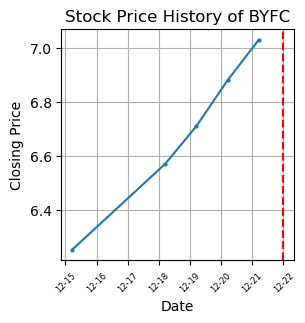

Options data for MDVL:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 0
Total Call engagement: 2
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 1
Number of ITM Put Options: 0


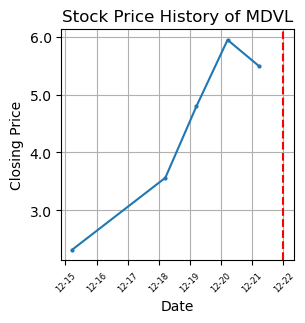

Options data for YELLQ:
Average IV for Calls: 0.6709720060558202
Average IV for Puts: 2.092950299668085
Total Call Volume: 562.0
Total Call open interest: 14371
Total Call engagement: 14933.0
Total Put Volume: 488.0
Total Put open interest: 10370
Total Put engagement: 10858.0
Number of ITM Call Options: 24
Number of ITM Put Options: 4


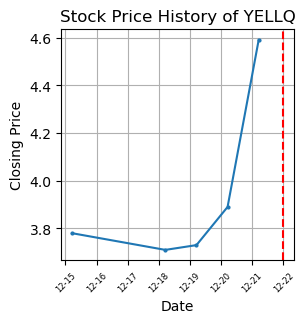

Options data for OMEX:
Average IV for Calls: 0.1882025625
Average IV for Puts: 0.3322556477864583
Total Call Volume: 422.0
Total Call open interest: 4544
Total Call engagement: 4966.0
Total Put Volume: 122.0
Total Put open interest: 1496
Total Put engagement: 1618.0
Number of ITM Call Options: 5
Number of ITM Put Options: 3


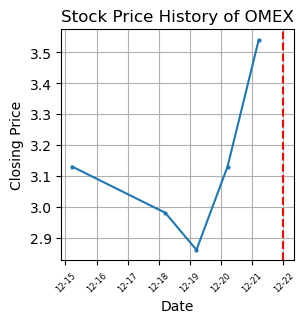

Options data for UONEK:
Average IV for Calls: 1.8571027856445312
Average IV for Puts: nan
Total Call Volume: 14
Total Call open interest: 100
Total Call engagement: 114
Total Put Volume: 0.0
Total Put open interest: 2.0
Total Put engagement: 2.0
Number of ITM Call Options: 1
Number of ITM Put Options: 1


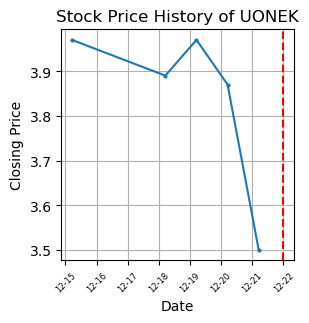

Options data for XELA:
Average IV for Calls: 0.5413490682896206
Average IV for Puts: nan
Total Call Volume: 17876.0
Total Call open interest: 16221
Total Call engagement: 34097.0
Total Put Volume: 815.0
Total Put open interest: 18765.0
Total Put engagement: 19580.0
Number of ITM Call Options: 16
Number of ITM Put Options: 17


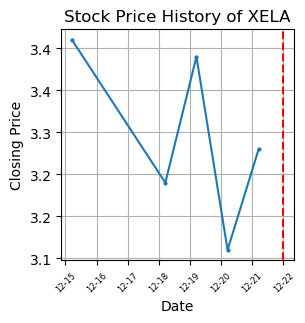

Options data for ENLV:
Average IV for Calls: 0.187508125
Average IV for Puts: nan
Total Call Volume: 162
Total Call open interest: 2013
Total Call engagement: 2175
Total Put Volume: 1.0
Total Put open interest: 0.0
Total Put engagement: 1.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


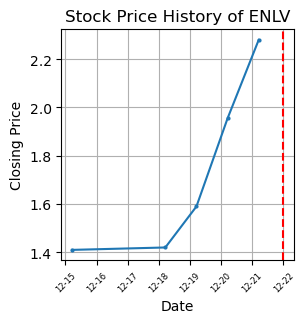

Options data for DZSI:
Average IV for Calls: 1.6724015520833333
Average IV for Puts: nan
Total Call Volume: 43.0
Total Call open interest: 614
Total Call engagement: 657.0
Total Put Volume: 1.0
Total Put open interest: 5.0
Total Put engagement: 6.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


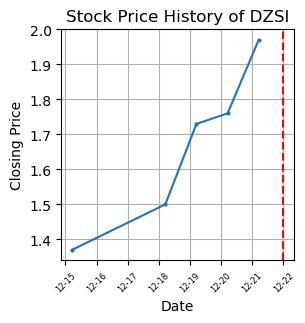

Options data for LILM:
Average IV for Calls: 0.7281318059659091
Average IV for Puts: nan
Total Call Volume: 528
Total Call open interest: 43019
Total Call engagement: 43547
Total Put Volume: 388.0
Total Put open interest: 4201.0
Total Put engagement: 4589.0
Number of ITM Call Options: 5
Number of ITM Put Options: 16


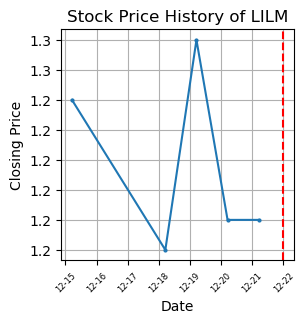

Options data for ARVL:
Average IV for Calls: nan
Average IV for Puts: 1.2727759870721722
Total Call Volume: 1292.0
Total Call open interest: 31243.0
Total Call engagement: 32535.0
Total Put Volume: 1078.0
Total Put open interest: 10579
Total Put engagement: 11657.0
Number of ITM Call Options: 4
Number of ITM Put Options: 19


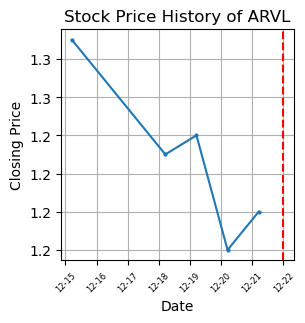

Options data for CTXR:
Average IV for Calls: 2.223961848958333
Average IV for Puts: 2.2500045833333333
Total Call Volume: 90.0
Total Call open interest: 39506
Total Call engagement: 39596.0
Total Put Volume: 55
Total Put open interest: 725
Total Put engagement: 780
Number of ITM Call Options: 0
Number of ITM Put Options: 5


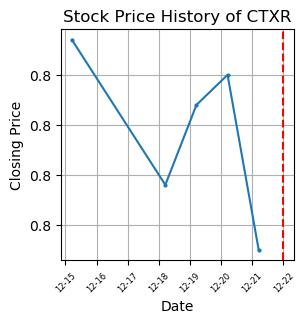

Options data for FUV:
Average IV for Calls: 1.9878513216145832
Average IV for Puts: 1.2196771329273892
Total Call Volume: 971
Total Call open interest: 8319
Total Call engagement: 9290
Total Put Volume: 657.0
Total Put open interest: 1649
Total Put engagement: 2306.0
Number of ITM Call Options: 1
Number of ITM Put Options: 16


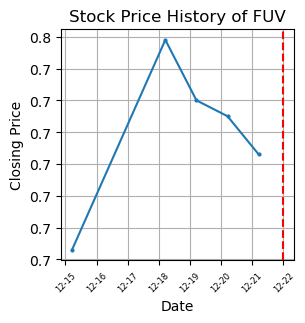

Options data for CAMP:
Average IV for Calls: 0.500005
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 342
Total Call engagement: 344
Total Put Volume: 1.0
Total Put open interest: 6.0
Total Put engagement: 7.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


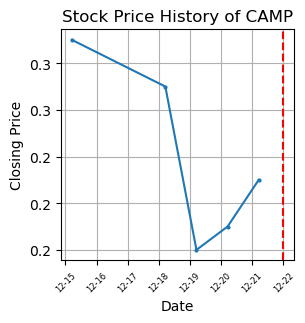

Options data for CSSE:
Average IV for Calls: 1.8750036897786457
Average IV for Puts: nan
Total Call Volume: 85.0
Total Call open interest: 3004
Total Call engagement: 3089.0
Total Put Volume: 92.0
Total Put open interest: 2539.0
Total Put engagement: 2631.0
Number of ITM Call Options: 0
Number of ITM Put Options: 12


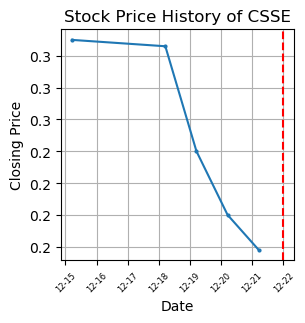

Options data for DSHK:
Average IV for Calls: 2.2083357812499997
Average IV for Puts: 3.333333333333334e-06
Total Call Volume: 12.0
Total Call open interest: 29603.0
Total Call engagement: 29615.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


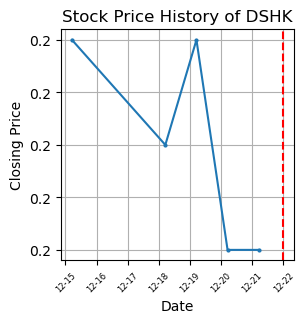

Options data for SRNEQ:
Average IV for Calls: 1.535716741071429
Average IV for Puts: 3.333333333333334e-06
Total Call Volume: 105.0
Total Call open interest: 14462
Total Call engagement: 14567.0
Total Put Volume: 13.0
Total Put open interest: 722.0
Total Put engagement: 735.0
Number of ITM Call Options: 0
Number of ITM Put Options: 12


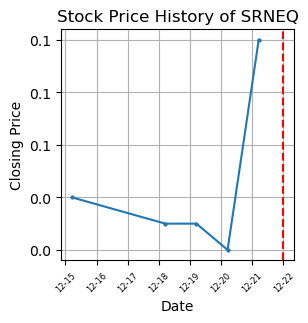

Options data for FXLV:
Average IV for Calls: 1.8333347395833337
Average IV for Puts: nan
Total Call Volume: 8.0
Total Call open interest: 918
Total Call engagement: 926.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


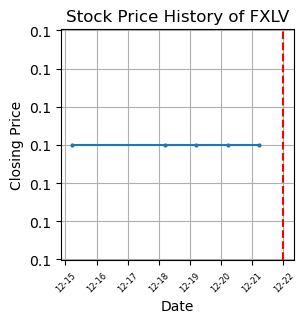

Options data for FRCB:
Average IV for Calls: 4.95948093492445
Average IV for Puts: 0.12963191773504273
Total Call Volume: 495
Total Call open interest: 62937
Total Call engagement: 63432
Total Put Volume: 213.0
Total Put open interest: 9713
Total Put engagement: 9926.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


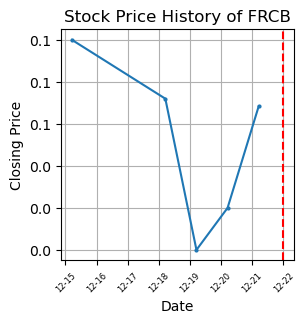

Options data for ONCR:
Average IV for Calls: 0.500005
Average IV for Puts: 1.0000000000000003e-05
Total Call Volume: 15
Total Call open interest: 0
Total Call engagement: 15
Total Put Volume: 0.0
Total Put open interest: 0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


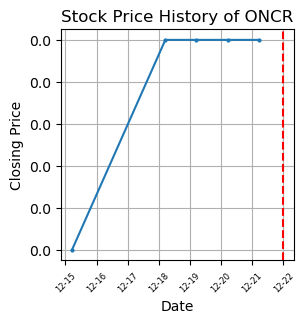

Options data for INFIQ:
Average IV for Calls: 0.08333416666666667
Average IV for Puts: 0.0
Total Call Volume: 1.0
Total Call open interest: 3286.0
Total Call engagement: 3287.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


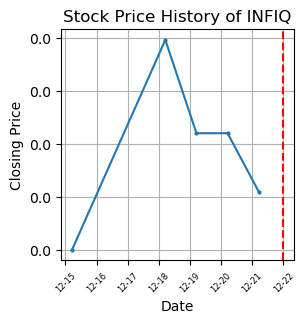

Options data for TTCFQ:
Average IV for Calls: 0.05588291176470589
Average IV for Puts: 2.3921568627450986e-06
Total Call Volume: 69.0
Total Call open interest: 37200
Total Call engagement: 37269.0
Total Put Volume: 35.0
Total Put open interest: 8218.0
Total Put engagement: 8253.0
Number of ITM Call Options: 0
Number of ITM Put Options: 29


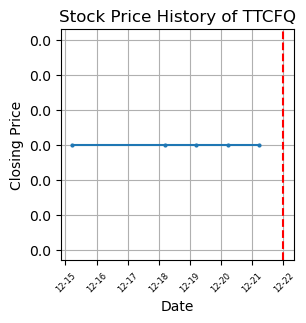

Options data for NOVNQ:
Average IV for Calls: 0.0
Average IV for Puts: 0.0
Total Call Volume: 0.0
Total Call open interest: 0.0
Total Call engagement: 0.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


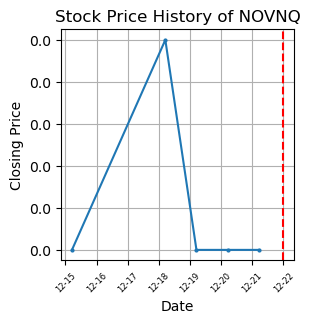

Options data for NMTRQ:
Average IV for Calls: 0.0
Average IV for Puts: nan
Total Call Volume: 0.0
Total Call open interest: 333.0
Total Call engagement: 333.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


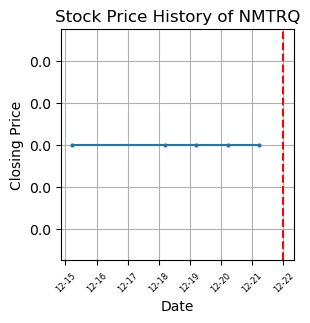

Options data for HYREQ:
Average IV for Calls: 0.07142928571428572
Average IV for Puts: 0.0
Total Call Volume: 5.0
Total Call open interest: 507.0
Total Call engagement: 512.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


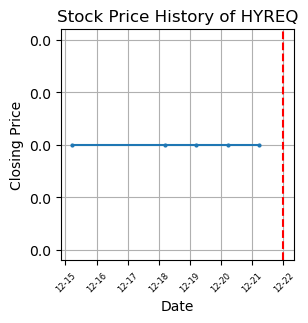

In [1]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-22'

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

print(url)

ticker_data_sorted, ticker_data_list = scrape_and_process_yahoo_finance_data(url)

# Second page
url += '&offset=100&size=100'

print(url)

ticker_data_sorted, ticker_data_list = scrape_and_process_yahoo_finance_data(url, ticker_data_list)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=7)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get Reality
    reality = analyze_stock_performance_post_earnings(ticker, release_date, start_date, end_date)

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date, release_date=release_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
